## Раздел III-1. Построение базовой модели

### Целью этапа является создание простейшей модели, которая предскзывает продажи используя средние значения из обучающей выборки. Все последующие модели, которые покажут худшие результаты - будут отбрасываться.

__Результатом__ этапа должна быть, модель, предсказывающая продажи по средним значениям

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime

In [25]:
# загрузим очищенный набор 
orders = pd.read_csv('orders_3-1.csv', low_memory=False, dtype={'CUST_ZIP_C': object})

In [26]:
# импортируем из вспомогателього модуля 'my_utils' класс для работы с orders
from my_utils import Order

# создадим объект
obj_orders = Order(orders)

### построим прогноз продаж на основе средних по покупателю из обучающего набора

In [27]:
#### разделим выборку на обучающий и тестовый наборы (80%, 20%)
train = orders.iloc[:int(len(orders)*.8)]
test = orders [train.shape[0] :]

print 'обучающий набор: ', train.shape[0] 
print 'тестовый набор:  ', test.shape[0]

обучающий набор:  91834
тестовый набор:   22959


In [28]:
# подсчитаем средние по покупателям на обучающем наборе
predict = pd.DataFrame(train[['CUST_NAM', 'SA_HDR_AMT']].groupby(by='CUST_NAM')
                       .SA_HDR_AMT.agg('median'))

In [29]:
# функция подставляет в кажой строке значение вычисленного прогноза
# при отсутствии покупателя заменяет средним по прогнозу
def set_predict(cust_name):
    try:
        pred = predict.loc[cust_name, 'SA_HDR_AMT']
    except KeyError:
        pred = fill_nan_amt
    return pred

In [30]:
'''
test['PRED_AMT'] = 0
# подставим средние в тестовый набор
for index, row in test[:10].iterrows():
    row['PRED_AMT'] = set_predict(row.CUST_NAM)
'''

fill_nan_amt = predict.SA_HDR_AMT.mean()
test['PRED_AMT'] = test['CUST_NAM'].apply(lambda x: set_predict(x))

/Users/sergey/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
test.tail()

,CUST_NAM,SA_HDR_AMT,CUST_CAT,CUST_PROFI,CUST_PRO01,CUST_PRO02,CUST_PRO03,CUST_PRO04,CUST_PRO05,LINES_QTY,ITEMS_QTY,CUST_ZIP_C,CUST_CITY,CUST_RET_QTY,CUST_RET_SUM,CUST_TIME_DEAL,CUST_TOTAL_AMT,SA_HDR_DOW,CUST_DIST,PRED_AMT
114788,JACKSONVILLE DELI,1257.77,NO-CAT,3.10,3.00,2.80,0.0,0.0,0.0,15,20.0,08505,BORDENTOWN,54.0,-5877.04,3108,695989.28,3,21.0,528.970000
114789,TOWN LIQUOR,3666.94,RG,4.25,3.95,3.85,0.0,0.0,0.0,20,59.0,08096,WOODBURY,92.0,-14687.26,2276,1557188.04,3,32.0,1574.695000
114790,MARTS LIQUORS,1052.78,RG,4.25,3.95,3.85,0.0,0.0,0.0,8,14.0,08060,EASTAMPTON,86.0,-6810.62,3017,847442.80,3,19.0,774.360000
114791,MERCERVILLE EXXON,6089.31,NO-CAT,3.50,3.00,2.75,0.0,0.0,0.0,46,89.0,08619,MERCERVILLE,16.0,-2998.59,309,302331.58,3,29.0,1803.889102
114792,CHANDEL & CO/LIQUOR,2189.38,RG,4.20,3.95,3.50,0.0,0.0,0.0,22,36.0,08060,MOUNT HOLLY,10.0,-1686.82,2971,334159.22,3,19.0,660.260000


In [32]:
obj_test = Order(test)

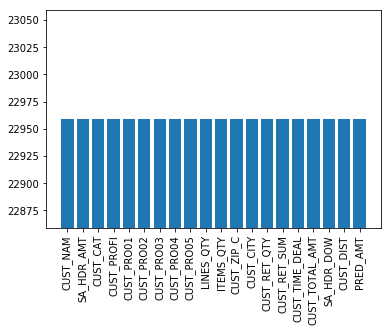

In [33]:
obj_test.futures_dist(y_max=100, y_min=100)

### выбор метрики и оценка качества модели

In [34]:
# в качестве метрики возьмем коэффициент детерминации r2, т.к. он наилучшим образом подходит 
# для моделей с сильной вариативностью прогнозируемого признака
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize

In [35]:
y_pred[:5]

91834    1447.900
91835     533.235
91836    1067.550
91837     572.280
91838    1550.690
Name: PRED_AMT, dtype: float64

In [36]:
y_true[:5]

91834    1595.22
91835     634.86
91836    1095.06
91837      74.46
91838    1795.72
Name: SA_HDR_AMT, dtype: float64

In [37]:
print 'коэф.детерминации r2 = {}'.format(r2_score(y_true, y_pred))

коэф.детерминации r2 = 0.247596165213


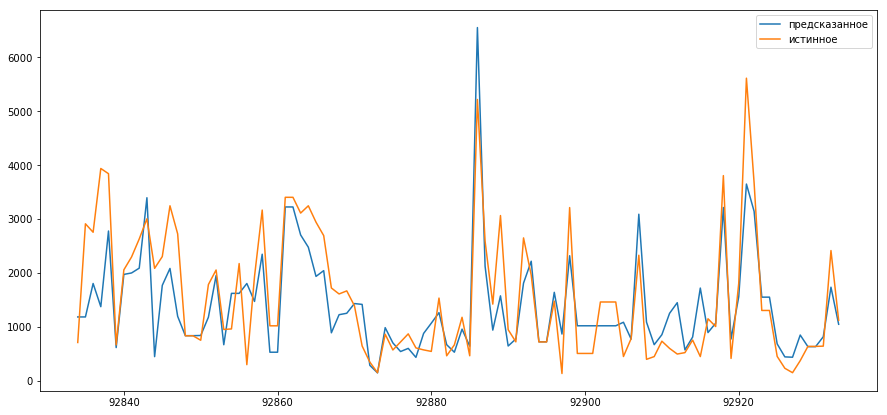

In [38]:
plt.figure(figsize=(15,7))
plt.plot(y_pred[1000:1100], label=u'предсказанное' )
plt.plot(y_true[1000:1100], label=u'истинное')
plt.legend();